# Benson Challenge 
## Question 1.) Pull in and concatenate data

In [387]:
%pylab 
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
import glob
import datetime as dt
import seaborn as sns
import os
sns.set()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


Import glob and use regex to aggregate file names into a list. Read that list of paths with pandas, append to a list of lists and finally concatenate the contents into a Pandas dataframe 

In [388]:
path = r'/Users/ikennaigboaka/ds/metis/metisgh/nyc18_ds17/challenges/challenges_questions/01-mta/'
all_files = glob.glob(path  + 'tur' + '*')
all_files
df = []
for file in all_files: 
    df.append(pd.read_csv(file))
df = pd.concat(df, ignore_index = True)

Some cleaning of names. Pull column names and capitalize then strip whitespace. Print first 5 rows

In [389]:
Capitalized_Headers = df.columns.str.capitalize().str.strip()
df.columns = Capitalized_Headers

## Question 2.) Create and formate a date time column

Create new column which is date + time <p>
Format this column using pandas datetime method

In [390]:
df = df.assign(Date_Time = lambda x: x['Date'] + ' ' + x['Time'])
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format="%m/%d/%Y %H:%M:%S")
df.head(5)

,C/a,Unit,Scp,Station,Linename,Division,Date,Time,Desc,Entries,Exits,Date_Time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,2018-08-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,2018-08-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,2018-08-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,2018-08-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,2018-08-25 16:00:00


## Question 3.) Create Data Frame with daily entries per turnstile

Find a unique identifier by combining fields to make unique string <p>
Group by this identifier <p>
if tuly unique, then group by this identifier and then by days


In [391]:
df['Turnstile_ID'] = df['Station'] + df['C/a'] + df['Unit'] + df['Scp']
df.head(5)

,C/a,Unit,Scp,Station,Linename,Division,Date,Time,Desc,Entries,Exits,Date_Time,Turnstile_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,2018-08-25 00:00:00,59 STA002R05102-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,2018-08-25 04:00:00,59 STA002R05102-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,2018-08-25 08:00:00,59 STA002R05102-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,2018-08-25 12:00:00,59 STA002R05102-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,2018-08-25 16:00:00,59 STA002R05102-00-00


In [392]:
(df.groupby(by=['Station','C/a','Unit','Scp','Date_Time']) \
.Entries.count().reset_index().sort_values('Entries', ascending = False)).head(10)

,Station,C/a,Unit,Scp,Date_Time,Entries
3294188,WHITEHALL S-FRY,A060,R001,00-00-01,2018-09-14 05:00:00,2
639203,36 AV,R511,R091,00-00-00,2018-06-21 16:00:00,2
1269544,ASTORIA DITMARS,R515,R095,00-00-01,2018-08-07 16:00:00,2
3203448,UTICA AV,N120A,R153,01-06-00,2018-07-11 09:00:00,2
1268825,ASTORIA DITMARS,R515,R095,00-00-00,2018-08-08 04:00:00,2
3293466,WHITEHALL S-FRY,A060,R001,00-00-00,2018-09-14 05:00:00,2
1268823,ASTORIA DITMARS,R515,R095,00-00-00,2018-08-07 20:00:00,2
0,1 AV,H007,R248,00-00-00,2018-05-26 00:00:00,1
2230507,GRD CNTRL-42 ST,R238A,R046,02-03-01,2018-05-26 16:00:00,1
2230501,GRD CNTRL-42 ST,R238A,R046,02-03-00,2018-09-21 16:00:00,1


7 entries with duplicates

KILL RECOVR AUD


In [393]:
identifier = ((df["Unit"] == "R001") & 
(df["Station"] == "WHITEHALL S-FRY") &
(df["Scp"] == "00-00-01") &
(df["Date_Time"] == '2018-09-14 05:00:00'))

df[identifier].head(10)

,C/a,Unit,Scp,Station,Linename,Division,Date,Time,Desc,Entries,Exits,Date_Time,Turnstile_ID
208320,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,REGULAR,2969337,1965665,2018-09-14 05:00:00,WHITEHALL S-FRYA060R00100-00-01
208321,A060,R001,00-00-01,WHITEHALL S-FRY,R1W,BMT,09/14/2018,05:00:00,RECOVR AUD,2969335,1965665,2018-09-14 05:00:00,WHITEHALL S-FRYA060R00100-00-01


In [394]:
df = df[df['Desc'] != 'RECOVR AUD']

In [395]:
(df.groupby(by=['Station','C/a','Unit','Scp','Date_Time']) \
.Entries.count().reset_index().sort_values('Entries', ascending = False)).head(5)

,Station,C/a,Unit,Scp,Date_Time,Entries
0,1 AV,H007,R248,00-00-00,2018-05-26 00:00:00,1
2221950,GRD CNTRL-42 ST,R238A,R046,02-03-00,2018-08-07 08:34:45,1
2221940,GRD CNTRL-42 ST,R238A,R046,02-03-00,2018-08-05 20:00:00,1
2221941,GRD CNTRL-42 ST,R238A,R046,02-03-00,2018-08-06 00:00:00,1
2221942,GRD CNTRL-42 ST,R238A,R046,02-03-00,2018-08-06 04:00:00,1


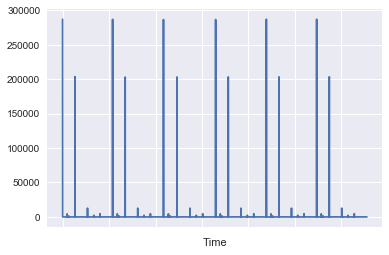

In [396]:
df.groupby('Time')['Entries'].count().plot()

n = 4. Counts are most often every 4 hours (6 per day as graph shows) <p>
But not **only** every 4 hours. <p>
We'll deal with that later. For now continue to get the graph for turnstile per day. First need entries as we seem to have a cum sum right now. Take diff after sorting by time grouped by unique identifier

In [397]:
df = df.drop(["Exits"], axis=1, errors="ignore")
df = df.sort_values(by=['Turnstile_ID','Date_Time'])


Let's take the first differences, create a rule that borders have NaN and drop the NaNs since every first turnstil entry will have this result (as its been sorted by turnstiles)

In [398]:
df['Diff'] = df.groupby(['Turnstile_ID'])['Entries'].transform(lambda x: x.diff())



In [399]:
df.isna().sum()

C/a                0
Unit               0
Scp                0
Station            0
Linename           0
Division           0
Date               0
Time               0
Desc               0
Entries            0
Date_Time          0
Turnstile_ID       0
Diff            4803
dtype: int64

In [400]:
df.groupby('Turnstile_ID').nunique().head(5)

,C/a,Unit,Scp,Station,Linename,Division,Date,Time,Desc,Entries,Date_Time,Turnstile_ID,Diff
Turnstile_ID,,,,,,,,,,,,,
1 AVH007R24800-00-00,1,1,1,1,1,1,119,8,1,694,714,1,514
1 AVH007R24800-00-01,1,1,1,1,1,1,119,8,1,697,714,1,531
1 AVH007R24800-03-00,1,1,1,1,1,1,119,8,1,697,714,1,289
1 AVH007R24800-03-01,1,1,1,1,1,1,119,8,1,690,714,1,265
1 AVH007R24800-03-02,1,1,1,1,1,1,119,8,1,694,714,1,325


nunique turnstiles matches the number or NaNs i'm about to drop so happy to drop them 

In [401]:
df.dropna(inplace = True)
#we wanna get rid of them permanently so keep the dropna

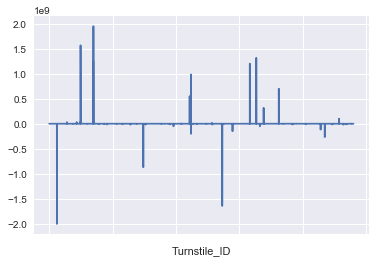

In [402]:
df.groupby(by='Turnstile_ID', as_index = True)['Diff'].sum().plot()

They go negative sometimes but magnitude seems similar to positive so lets assume counter runs in reverse and take the absolute

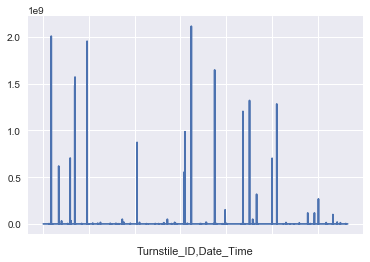

In [403]:
df['Diff'] = abs(df['Diff'])
df.groupby(by=['Turnstile_ID','Date_Time'], as_index = True)['Diff'].sum().plot()



looks better..some values seem very high though. Let's filter for away Audits from Descriptions

In [404]:
df['Desc'] = df['Desc'].apply(lambda x: x if x == 'REGULAR' else np.nan)

Lastly we filter for ridiculously large observations. 10000/turnstile per time snapshot (which for the most part is 4 hours) is already a pretty conservative cut

In [405]:
df['Diff'] = df2['Diff'].apply(lambda x: x if x <= 10000 else np.nan)
df.dropna(inplace = True)

Saving to load faster next time

In [406]:
df.to_csv("MTA_Data_cleaned.csv", header = '?')


In [407]:
df = pd.read_csv("MTA_Data_cleaned.csv", index_col=False)

Finally, to get Daily entries we group by ID and DATE and sum the Entries column

In [408]:
df_daily = pd.DataFrame(df.groupby(by=['Turnstile_ID','Date'])['Diff'].sum())
df_daily.head(5)

Diff
Turnstile_ID         Date              
1 AVH007R24800-00-00 05/26/2018  1245.0
                     05/27/2018   895.0
                     05/28/2018   698.0
                     05/29/2018  1121.0
                     05/30/2018  1111.0

## Question 4.) Daily Time Series for one Turnstile

We already have the daily values for unique turnstiles so we can just slice one

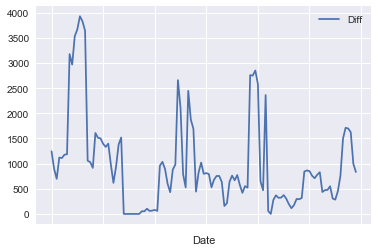

In [409]:
df_daily.loc['1 AVH007R24800-00-00'].plot()

## Question 5.) Daily Time Series for group of Turnstiles with same Scp

In [410]:
df.groupby(by=['Station','C/a','Unit','Date']) \
.Diff.sum().reset_index().sort_values(['Station','C/a','Unit','Date']).head(10)

,Station,C/a,Unit,Date,Diff
0,1 AV,H007,R248,05/26/2018,3664.0
1,1 AV,H007,R248,05/27/2018,1670.0
2,1 AV,H007,R248,05/28/2018,1335.0
3,1 AV,H007,R248,05/29/2018,2589.0
4,1 AV,H007,R248,05/30/2018,2875.0
5,1 AV,H007,R248,05/31/2018,2961.0
6,1 AV,H007,R248,06/01/2018,2926.0
7,1 AV,H007,R248,06/02/2018,12573.0
8,1 AV,H007,R248,06/03/2018,15413.0
9,1 AV,H007,R248,06/04/2018,17354.0


## 6.) Turnstiles per station

Need to have a unique identifier for a station so let's add the linename to the station

In [411]:
df['Station_Unique'] = df['Station'] + df['Linename']

#to get our time series data per station
df_per_station = df.groupby(by=['Station_Unique','Date'], as_index = True).Diff.sum()
df_per_station.head(10)

Station_Unique  Date      
1 AVL           05/26/2018     5613.0
                05/27/2018     2824.0
                05/28/2018     2325.0
                05/29/2018     5033.0
                05/30/2018     5356.0
                05/31/2018     5179.0
                06/01/2018     5410.0
                06/02/2018    24872.0
                06/03/2018    28767.0
                06/04/2018    32623.0
Name: Diff, dtype: float64

## 7.) Time series for one station

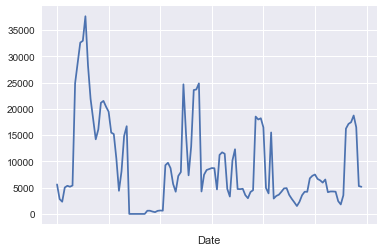

In [412]:
df_per_station.loc['1 AVL'].plot()

## 8.) Breakdown per days of week for one station overlayed on one chart

In [413]:
df_1_station = df_per_station.loc['1 AVL']
df_1_station = pd.DataFrame(df_1_station)
df_1_station.head(5)
df_1_station.index = pd.to_datetime(df_1_station.index)

In [414]:
df_1_station[0:5]
df_1_station['Date2'] = df_1_station.index

,Diff,Date2
Date,,
2018-05-26,5613.0,2018-05-26
2018-05-27,2824.0,2018-05-27
2018-05-28,2325.0,2018-05-28
2018-05-29,5033.0,2018-05-29
2018-05-30,5356.0,2018-05-30
2018-05-31,5179.0,2018-05-31
2018-06-01,5410.0,2018-06-01
2018-06-02,24872.0,2018-06-02
2018-06-03,28767.0,2018-06-03


In [415]:
df_1_station['Date2'] = pd.to_datetime(df_1_station['Date2'], format = "%Y/%m/%d")

In [416]:
df_1_station['Day of the Week'] = df_1_station['Date2'].dt.day_name()

In [417]:
df_1_station.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2018-05-26 to 2018-09-21
Data columns (total 3 columns):
Diff               119 non-null float64
Date2              119 non-null datetime64[ns]
Day of the Week    119 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.7+ KB


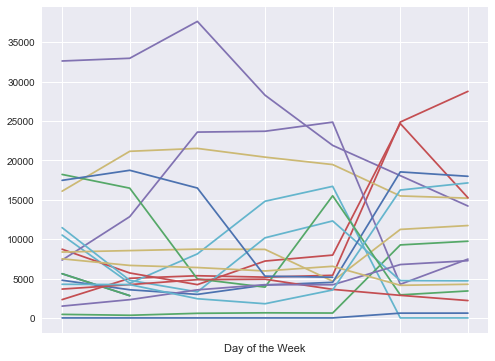

In [418]:
#cool it's datetime, now to get weeks and plot
df_1_station['Week_Number'] = df_1_station['Date2'].dt.week
fig,ax = plt.subplots(figsize=(8,6), sharex= True, sharey= True)
plots = df_1_station.groupby('Week_Number').plot.line(y='Diff',x='Day of the Week',ax=ax, legend = None)

## 9.) Breakdown per days of week for one station overlayed on one chart

Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate


Answer = FULTON ST2345ACJZ ins

In [422]:
df_station_rank = df.groupby('Station_Unique')['Diff'].sum().reset_index()
df_station_rank.sort_values('Diff', ascending = False, inplace= True)
df_station_rank.reset_index(inplace=True)
df_station_rank.head(10)

,index,Station_Unique,Diff
0,302,FULTON ST2345ACJZ,8233141.0
1,89,34 ST-HERALD SQBDFMNQRW,8207972.0
2,312,GRD CNTRL-42 ST4567S,7506553.0
3,93,34 ST-PENN STAACE,7262382.0
4,102,42 ST-PORT AUTHACENQRS1237W,7042566.0
5,404,PATH NEW WTC1,6638648.0
6,260,CORTLANDT STRNW,5034964.0
7,234,CANAL STJNQRZ6W,4561221.0
8,464,WALL ST45,4188079.0
9,217,BOWLING GREEN45,4168241.0


## 10.) Top Stations (chose to do 10otherwise graph a bit hard to read)

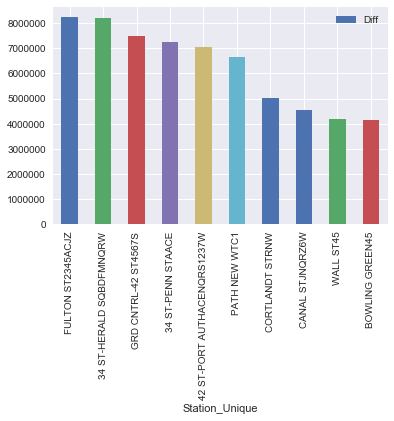

In [420]:
df_station_rank.iloc[:10,:].plot.bar(x = 'Station_Unique', y = 'Diff')